### Introduction

This is the first part of the data projects on the hotel booking demand data. This Jupyter Notebook document contains a series of visual analyses on a dataset that contains booking information of a hospitality establishment that has two hotel types - Resort and City - from July 2015 to August 2017. It consists of various visual analyses involving different features/factors of hotel bookings. Features analyses focus on include overall monthly rush, guests' home countries, meal preferences, average daily rates (ADR), special requests, cancellations, market segments, etc. 

Some of the relevant features will be analyzed in separate Notebook documents as independent projects. Each independent project will investigate in depth a single feature and its possible dependencies or correlations to other features. Thorough analysis will be performed on features that are considered relevant topics or answers to questions the executives might develop regarding the performance of the hospitality establishment.

---
#### Table of Contents

[Data Collection](#Data-Collection)<br>
[Data Cleaning and Data Pre-processing](#Data-Cleaning-and-Data-Pre-processing)<br>
[Analysis of Guests' Home Countries](#Analysis-of-Guests'-Home-Countries)<br>
[Analysis of Monthly Rush](#Analysis-of-Monthly-Rush)<br>
[Analysis of Average Daily Rate](#Analysis-of-Average-Daily-Rate)<br>
[Analysis of Guests' Meal Preferences](#Analysis-of-Guests'-Meal-Preferences)<br>
[Analysis of Special Requests](#Analysis-of-Special-Requests)<br>
[Analysis of Cancellations](#Analysis-of-Cancellations)<br>
[Analysis of the Length of Stays](#Analysis-of-the-Length-of-Stays)<br>
[Analysis of Market Segments](#Analysis-of-Market-Segments)<br>

---

In [1]:
from IPython.display import display
import missingno as msno

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import sort_dataframeby_monthorweek as sd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',50)
sns.set_style("white")

palette = sns.color_palette(palette='Set1', n_colors=2)
palette.reverse()

### Data Collection

In [2]:
# path

df = pd.read_csv(path+'/hotel_bookings.csv')

In [3]:
display(df)
display(df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

None

### Data Cleaning and Data Pre-processing

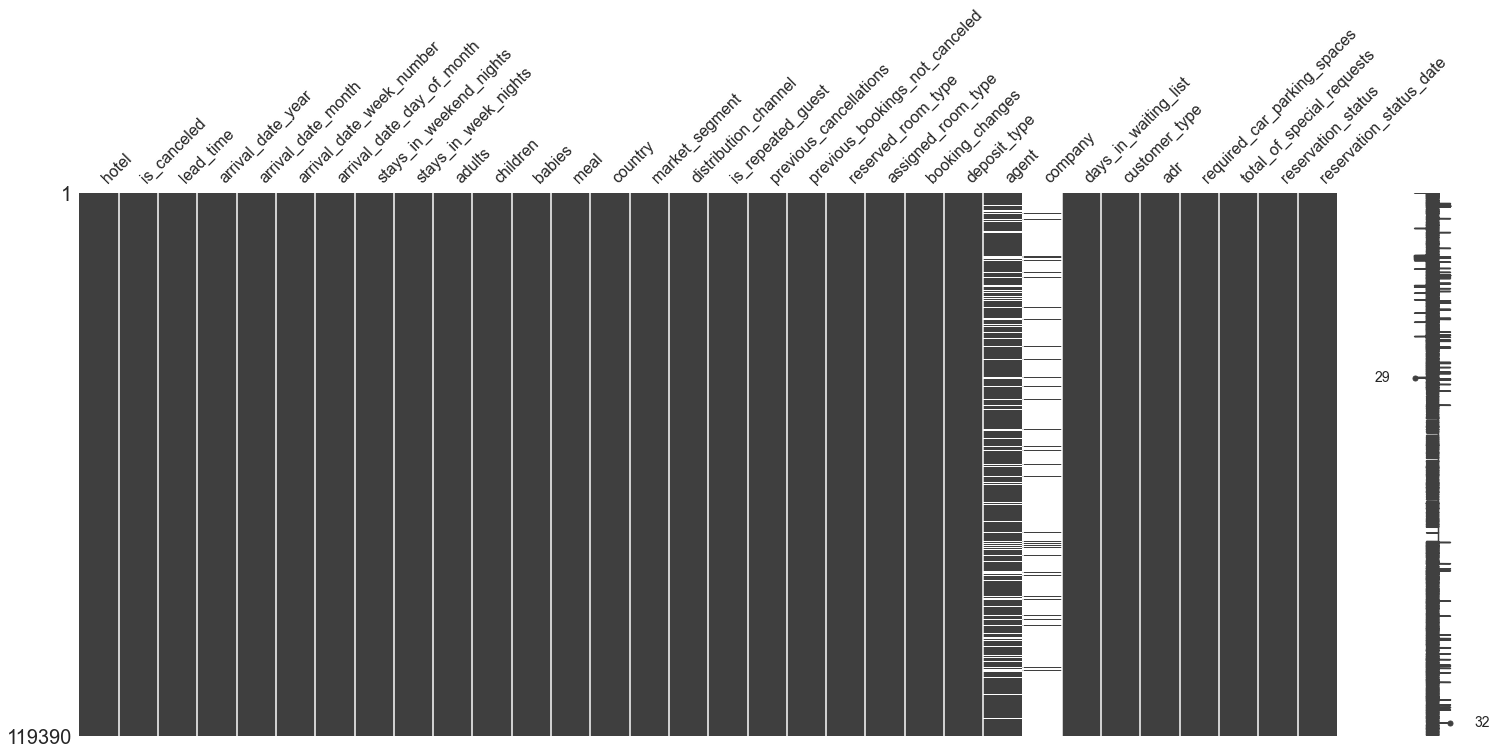

In [4]:
ax = msno.matrix(df)

In [5]:
# if no agency was given, booking was likely made without one. if no company was given, it was likely private. rest should be self-explanatory

df.fillna(0,inplace=True)
df.isnull().values.any()

False

In [6]:
df['children'] = df['children'].astype(int)
df['children'].value_counts()

0     110800
1       4861
2       3652
3         76
10         1
Name: children, dtype: int64

In [7]:
df['adults'].value_counts().sort_index()

0       403
1     23027
2     89680
3      6202
4        62
5         2
6         1
10        1
20        2
26        5
27        2
40        1
50        1
55        1
Name: adults, dtype: int64

In [8]:
df['babies'].value_counts().sort_index()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [9]:
# create a filter that filters all bookings with no children & no adults & no babies at the same time, i.e. no guests

filter = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0)

# only keep bookings with at least one guest

df = df[~filter].reset_index(drop=True)

display(df.head())
display(df.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


(119210, 32)

In [10]:
# since the original dataframe contains data on two full years plus two extra months, 
# get rid of data on those two extra months for more accurate monthly analysis

df = df[~((df.arrival_date_year == 2015) & (df.arrival_date_month.isin(['July','August'])))].reset_index(drop=True)

In [11]:
# global dataframes needed throughout different analyses

df_clean = df[df['is_canceled']==0].reset_index(drop=True)

resort = df[(df['hotel']=='Resort Hotel') & (df['is_canceled']==0)].reset_index(drop=True)
city = df[(df['hotel']=='City Hotel') & (df['is_canceled']==0)].reset_index(drop=True)

### Analysis of Guests' Home Countries

#### Home Countries of Guests Who Stayed at Resort Hotel

In [12]:
resort_countries = resort['country'].value_counts().reset_index()
resort_countries.columns=['country','no. of bookings']
resort_countries = resort_countries[resort_countries['country']!=0]
resort_countries

,country,no. of bookings
0,PRT,9196
1,GBR,5683
2,ESP,2775
3,IRL,1596
4,FRA,1340
...,...,...
113,UGA,1
114,COM,1
115,MUS,1
116,BIH,1


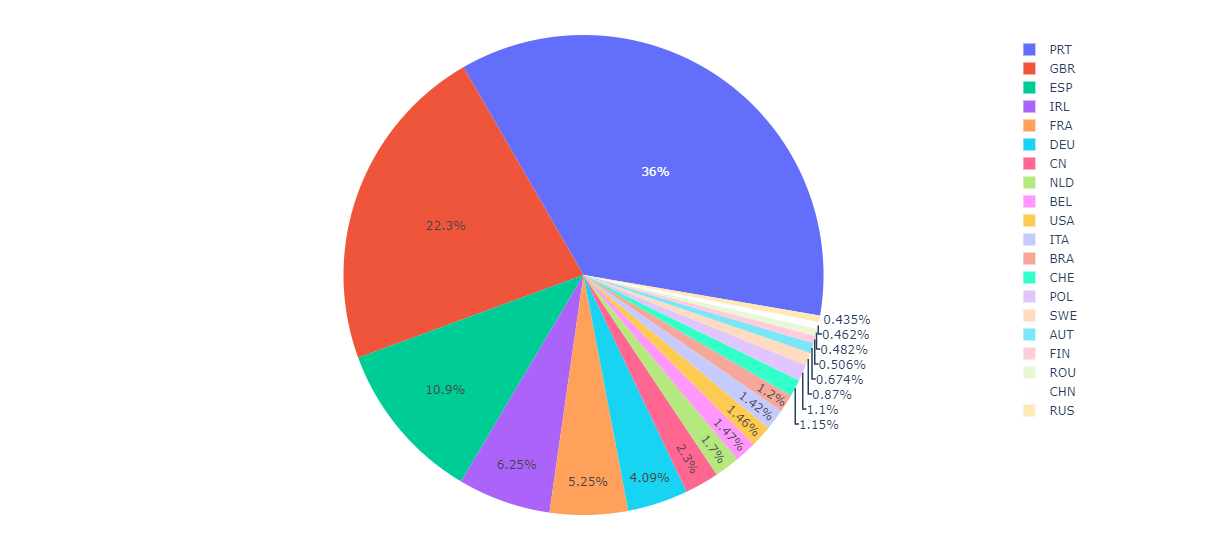

In [13]:
resort_countries.loc[resort_countries['no. of bookings'] < 100] = 'Other Countries' # represent only countries with bookings over 100
fig = px.pie(resort_countries, values='no. of bookings', names='country', height=550)
fig.update_layout(margin=dict(l=0, r=0, t=35, b=35))
fig.update_traces(rotation=-30)
fig.show()

#### Home Countries of Guests Who Stayed at City Hotel

In [14]:
city_countries = city['country'].value_counts().reset_index()
city_countries.columns=['country','no. of bookings']
city_countries = city_countries[city_countries['country']!=0]
city_countries

,country,no. of bookings
0,PRT,9959
1,FRA,6930
2,DEU,4937
3,GBR,3732
4,ESP,2965
...,...,...
146,SYC,1
147,JAM,1
148,BFA,1
149,NAM,1


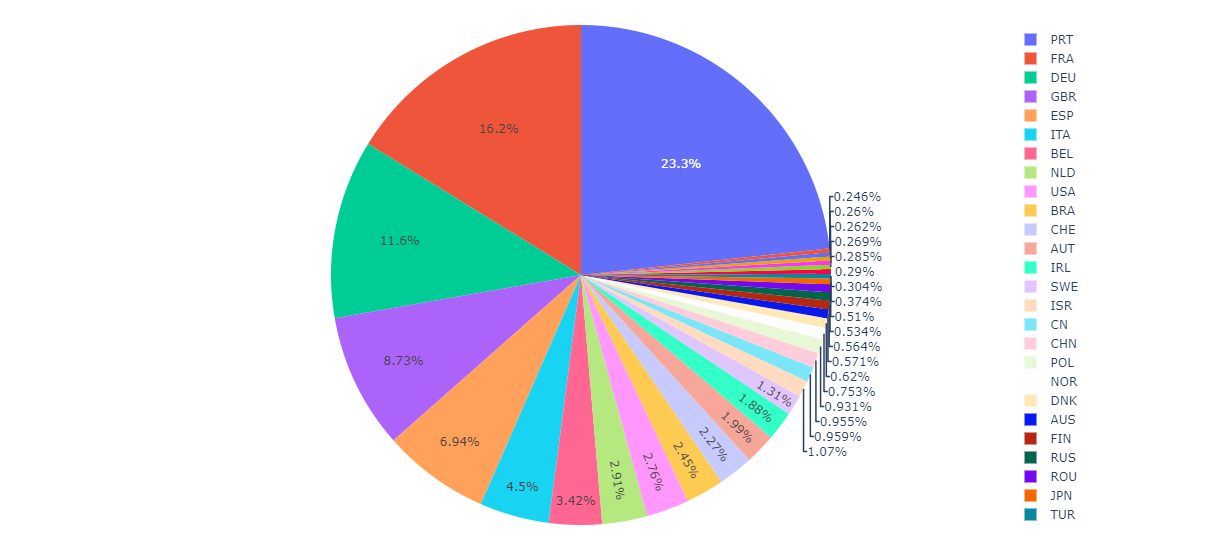

In [15]:
city_countries.loc[city_countries['no. of bookings'] < 100] = 'Other Countries' # represent only countries with bookings over 100
fig = px.pie(city_countries, values='no. of bookings', names='country', height=550)
fig.update_layout(margin=dict(l=0, r=0, t=25, b=25))
fig.show()

#### Spatial Analysis of Guests' Home Countries, Both Hotels

In [16]:
countries = df[df['is_canceled']==0]['country'].value_counts().reset_index()
countries.columns=['country','no. of bookings']
countries

,country,no. of bookings
0,PRT,19155
1,GBR,9415
2,FRA,8270
3,DEU,5980
4,ESP,5740
...,...,...
160,MLI,1
161,BHR,1
162,NAM,1
163,SYC,1


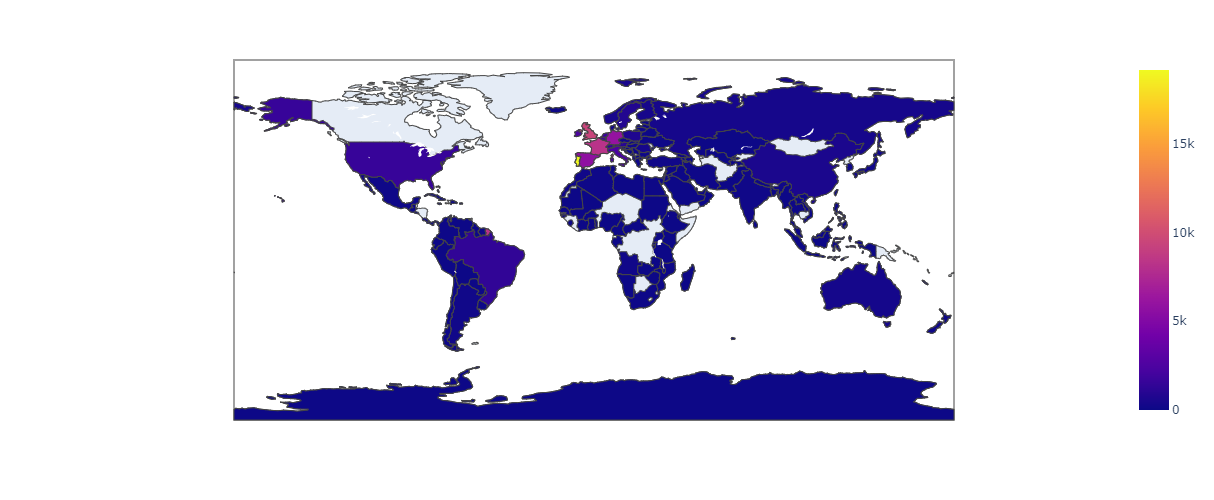

In [17]:
data = px.choropleth(countries,
                     locations=countries['country'],
                     locationmode='ISO-3',
                     color=countries['no. of bookings'],
                     hover_name=countries['country'],
                     height=500,
                     labels={'no. of bookings':''}
                     )

fig = go.Figure(data=data)

iplot(fig)

You can see that guests come from all over the world. Most guests come from Portugal, followed by The United Kingdom, France, Spain, and Germany. More guests come from Europe than other continents.

### Analysis of Hotel Types

In [18]:
df['hotel'].value_counts()

City Hotel      75293
Resort Hotel    37260
Name: hotel, dtype: int64

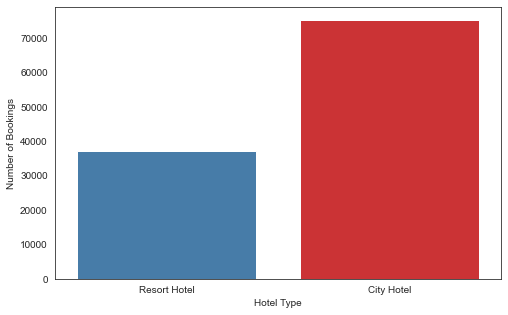

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='hotel', data=df, palette = palette)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.show()

In [20]:
def percentage(part, whole):
    return 100 * part/whole

In [21]:
print(str(percentage(df[df['hotel'] == 'Resort Hotel'].hotel.count(), df.shape[0]).round(2)) + '%' + ' of total bookings were made for Resort Hotel.')
print(str(percentage(df[df['hotel'] == 'City Hotel'].hotel.count(), df.shape[0]).round(2)) + '%' + ' of total bookings were made for City Hotel')

33.1% of total bookings were made for Resort Hotel.
66.9% of total bookings were made for City Hotel


### Analysis of Monthly Rush

In [22]:
resort_rush = resort['arrival_date_month'].value_counts().reset_index()
resort_rush.columns=['month','no. of rooms occupied']

city_rush = city['arrival_date_month'].value_counts().reset_index()
city_rush.columns=['month','no. of rooms occupied']

In [23]:
rush = resort_rush.merge(city_rush, on='month')
rush.columns = ['month', 'no. of rooms occupied in resort', 'no. of rooms occupied in city']
rush = sd.Sort_Dataframeby_Month(df=rush, monthcolumnname='month')
rush

,month,no. of rooms occupied in resort,no. of rooms occupied in city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,2079,4313
7,August,2214,4125
8,September,2102,4283
9,October,2575,4326


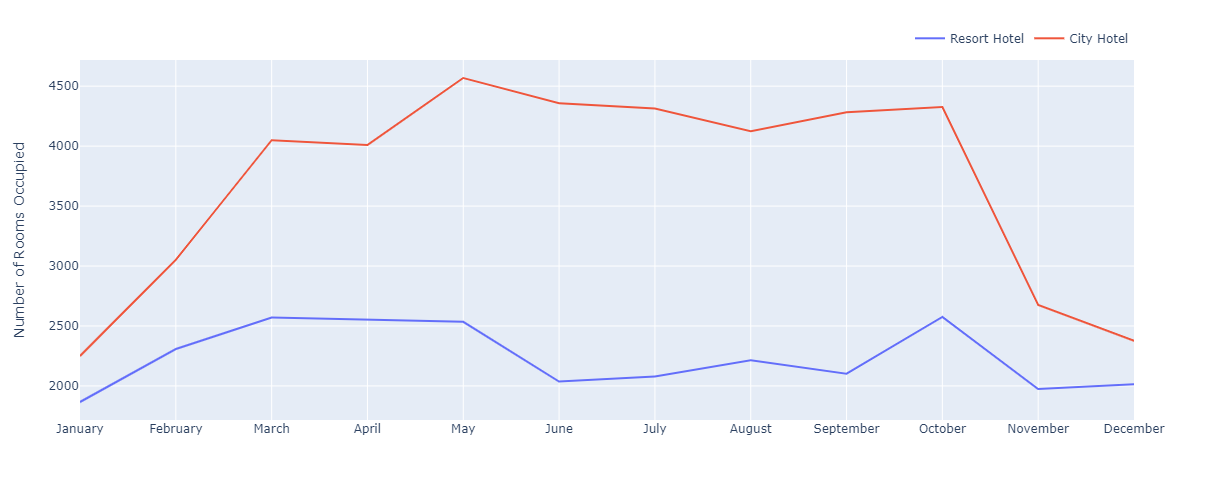

In [24]:
fig = px.line(data_frame=rush, x='month', y=['no. of rooms occupied in resort', 'no. of rooms occupied in city'], height=500,
              labels={'value':'Number of Rooms Occupied','month':'','variable':''})

series_names = ['Resort Hotel', 'City Hotel']

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
    
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

The City Hotel generally has more guests throughout the year than the Resort Hotel does, and its number of occupied rooms stays hiked all year round except from November through February. As for the Resort Hotel, the number of occupied rooms peaks in July and August during the peak season.

### Analysis of Average Daily Rate

#### How does price per night vary over the year?

In [25]:
resort_adr = resort.groupby('arrival_date_month')['adr'].mean().reset_index()
city_adr= city.groupby('arrival_date_month')['adr'].mean().reset_index()

In [26]:
adr = resort_adr.merge(city_adr,on='arrival_date_month')
adr.columns = ['month','adr for resort','adr for city']
adr = sd.Sort_Dataframeby_Month(adr, 'month')
adr

,month,adr for resort,adr for city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,162.794949,120.258164
7,August,194.381323,129.676347
8,September,96.416860,112.776582
9,October,61.775449,102.004672


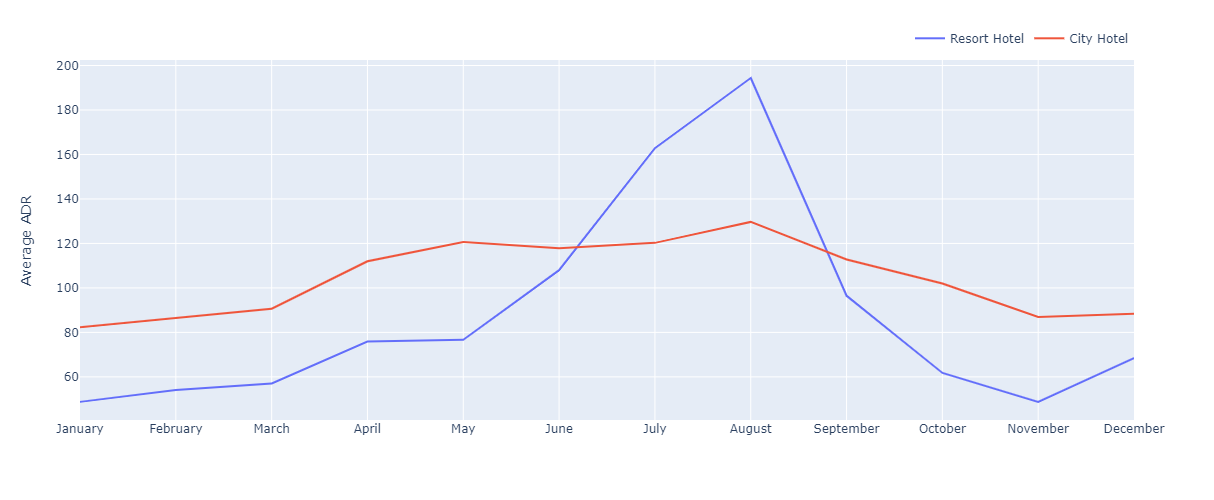

In [27]:
fig = px.line(adr, x='month', y=['adr for resort','adr for city'], height=500, labels={'value':'Average ADR','month':'','variable':''})

series_names = ['Resort Hotel', 'City Hotel']

for idx, name in enumerate(series_names):
    fig.data[idx].name = name
    fig.data[idx].hovertemplate = name
    
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

The average price of the Resort Hotel is much higher than that of the City Hotel during the summer (to no surprise). The average price of the City Hotel varies less throughout the year and rises starting from spring through the end of autumn.

#### How Does ADR Vary by Room Type?

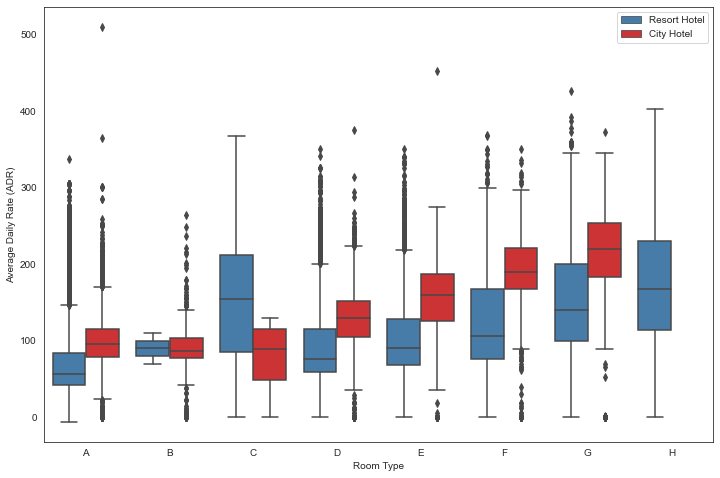

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type', y='adr', data=df_clean.sort_values(by='reserved_room_type'), hue='hotel', hue_order=['Resort Hotel','City Hotel'], 
            palette=palette)
plt.xlabel('Room Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='')
plt.show()

### Analysis of Guests' Meal Preferences

In [29]:
df.groupby(['hotel','meal']).size().reset_index().pivot_table(columns='meal', index='hotel', values=0, margins=True, aggfunc='sum')

meal,BB,FB,HB,SC,Undefined,All
hotel,,,,,,
City Hotel,59285.0,44.0,5595.0,10369.0,NaN,75293
Resort Hotel,28046.0,652.0,7319.0,74.0,1169.0,37260
All,87331.0,696.0,12914.0,10443.0,1169.0,112553


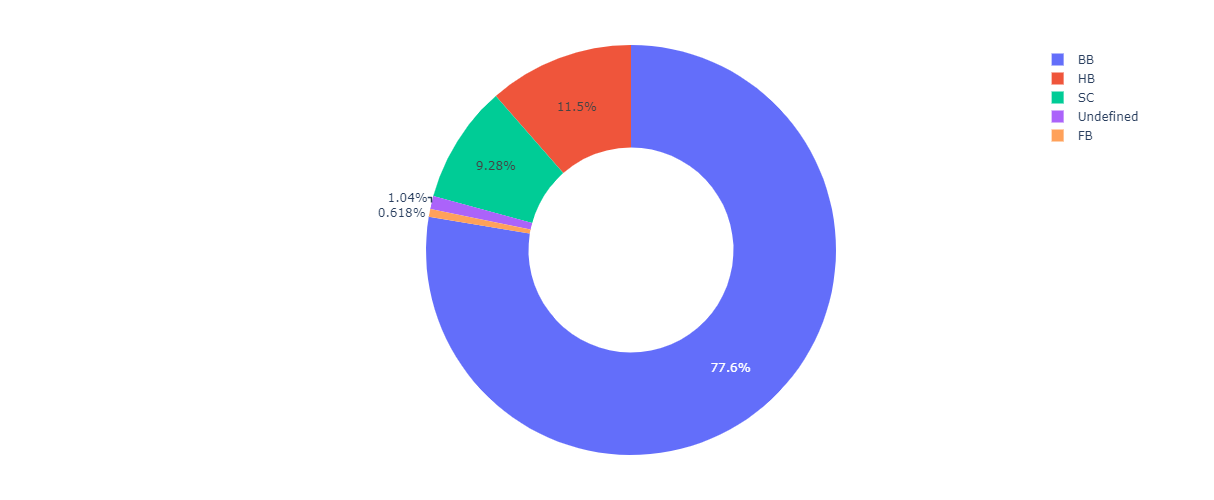

In [30]:
fig = px. pie(df, values=df['meal'].value_counts(), names=df['meal'].value_counts().index, hole=0.5, height=500)
fig.update_layout(margin=dict(l=0, r=0, t=45, b=45))
fig.show()

You can see that the Bed and Breakfast meal option is significantly favored over other options, taking up almost 80% of the total meal choices.

### Analysis of Special Requests

In [31]:
df.groupby(['hotel','total_of_special_requests']).size().reset_index().pivot_table(columns='total_of_special_requests', index='hotel', values=0, 
                                                                                   margins=True, aggfunc='sum')

total_of_special_requests,0,1,2,3,4,5,All
hotel,,,,,,,
City Hotel,44695,20963,7871,1543,195,26,75293
Resort Hotel,21148,10837,4343,788,131,13,37260
All,65843,31800,12214,2331,326,39,112553


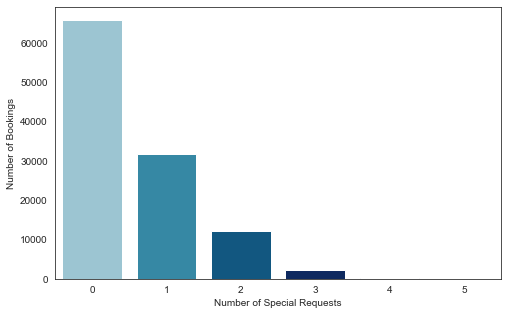

In [32]:
plt.figure(figsize=(8,5))
sns.countplot(x='total_of_special_requests', data=df, palette = 'ocean_r')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.show()

Around 55% of guests do not have any special requests.

#### Special Requests and Cancellations

In [33]:
pivot = df.groupby(['is_canceled','total_of_special_requests']).size().reset_index().pivot_table(columns='total_of_special_requests', index='is_canceled', values=0)
pivot

total_of_special_requests,0,1,2,3,4,5
is_canceled,,,,,,
0,34601,24837,9532,1913,291,37
1,31242,6963,2682,418,35,2


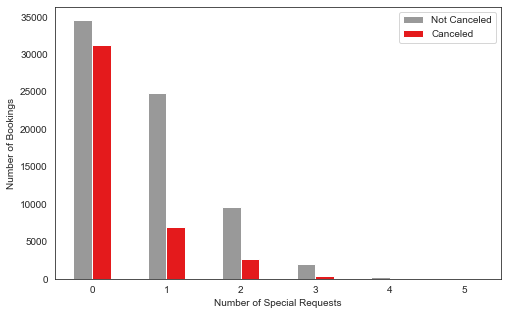

In [34]:
pivot.transpose().plot(kind='bar', xlabel='Number of Special Requests', ylabel='Number of Bookings', rot=0, figsize=(8,5), colormap='Set1_r')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

### Analysis of Cancellations

#### Proportion of Cancelled Bookings

In [35]:
df.groupby(['is_canceled', 'hotel']).size().reset_index().pivot_table(columns='is_canceled', index='hotel', values=0, margins=True, aggfunc='sum')

is_canceled,0,1,All
hotel,,,
City Hotel,44385,30908,75293
Resort Hotel,26826,10434,37260
All,71211,41342,112553


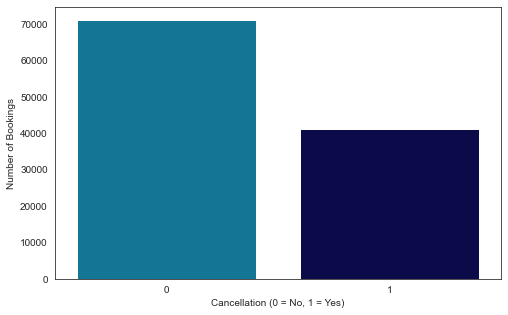

In [36]:
plt.figure(figsize=(8,5))
sns.countplot(x='is_canceled', data=df, palette = 'ocean_r')
plt.xlabel('Cancellation (0 = No, 1 = Yes)')
plt.ylabel('Number of Bookings')
plt.show()

In [37]:
print('For all hotels, ' + str(percentage(df[df['is_canceled'] == 1].is_canceled.count(), df.shape[0]).round(2)) + '%' + ' of total bookings were cancelled.')
print('For Resort Hotels, ' 
      + str(percentage(df[(df['is_canceled'] == 1) & (df['hotel'] == 'Resort Hotel')].is_canceled.count(), df[df['hotel'] == 'Resort Hotel'].shape[0]).round(2)) + '%' 
      + ' of total Resort Hotel bookings were cancelled.')
print('For City Hotels, ' 
      + str(percentage(df[(df['is_canceled'] == 1) & (df['hotel'] == 'City Hotel')].is_canceled.count(), df[df['hotel'] == 'City Hotel'].shape[0]).round(2)) + '%' 
      + ' of total City Hotel bookings were cancelled.')

For all hotels, 36.73% of total bookings were cancelled.
For Resort Hotels, 28.0% of total Resort Hotel bookings were cancelled.
For City Hotels, 41.05% of total City Hotel bookings were cancelled.


#### Cancellations by Hotel Type

In [38]:
cancel = df[df['is_canceled']==1].reset_index(drop=True)
display(cancel.head())
display(cancel.shape)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,38,2015,September,36,1,0,2,2,1,1,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,123.00,0,0,Canceled,2015-08-06
1,Resort Hotel,1,47,2015,September,36,1,0,2,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Canceled,2015-07-22
2,Resort Hotel,1,71,2015,September,36,1,0,3,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,0.0,0,Transient,137.67,0,1,Canceled,2015-07-06
3,Resort Hotel,1,85,2015,September,36,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,111.00,0,0,Canceled,2015-07-31
4,Resort Hotel,1,132,2015,September,36,1,0,4,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,240.0,0.0,0,Transient,123.00,0,1,Canceled,2015-06-08


(41342, 32)

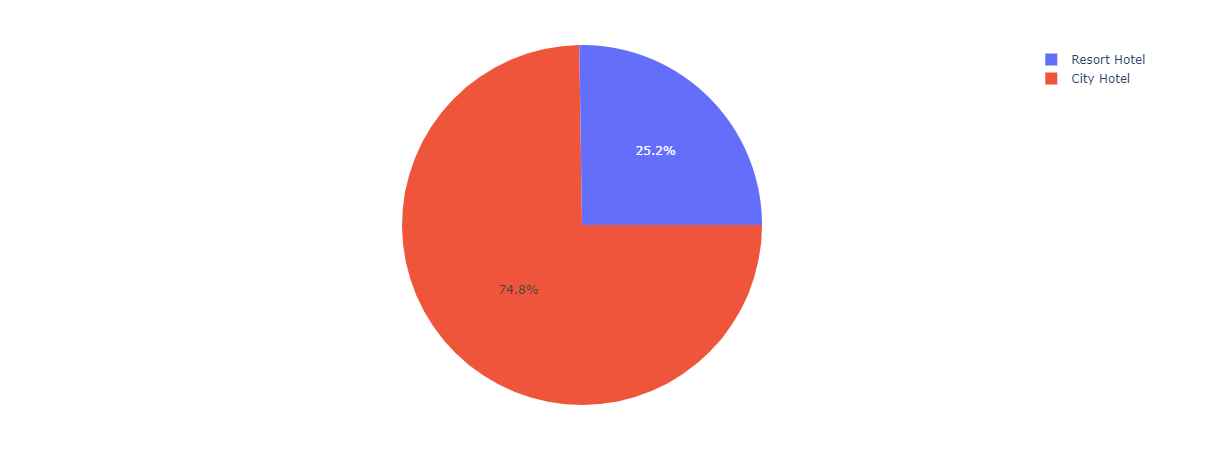

In [39]:
fig = px.pie(values=[len(cancel[cancel['hotel']=='Resort Hotel']),len(cancel[cancel['hotel']=='City Hotel'])], names=['Resort Hotel', 'City Hotel'], height=450, 
             color=['blue','red'])
fig.update_layout(margin=dict(l=150, r=200, t=45, b=45), legend={'traceorder':'reversed'})
fig.update_traces(rotation=90, hovertemplate='label=%{label} <br>value=%{value}')
fig.show()

#### Monthly Cancellations

In [40]:
cancel_month = cancel.groupby(['arrival_date_month','hotel']).agg('count').reset_index()
cancel_month = cancel_month.iloc[:,0:3]
cancel_month.columns = ['month','hotel','cancellations']
cancel_month = sd.Sort_Dataframeby_Month(df=cancel_month, monthcolumnname='month')
cancel_month

,month,hotel,cancellations
0,January,City Hotel,1481
1,January,Resort Hotel,325
2,February,City Hotel,1899
3,February,Resort Hotel,794
4,March,City Hotel,2385
5,March,Resort Hotel,763
6,April,City Hotel,3459
7,April,Resort Hotel,1059
8,May,City Hotel,3653
9,May,Resort Hotel,1024


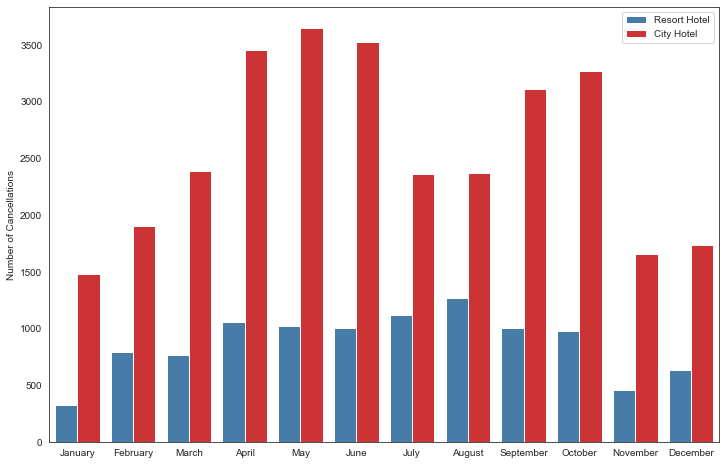

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(x = "month", y = "cancellations" , hue="hotel", hue_order = ["Resort Hotel", "City Hotel"], data=cancel_month, palette=palette)
plt.xlabel('')
plt.ylabel('Number of Cancellations')
plt.legend(title='')
plt.show()

The number of cancellations is relative to the number of total bookings.

### Analysis of the Length of Stays

In [42]:
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,48,2015,September,36,1,0,3,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,151.00,0,0,Check-Out,2015-09-04,3
1,Resort Hotel,0,48,2015,September,36,1,0,3,2,0,0,HB,ESP,Direct,Direct,0,0,0,A,C,0,No Deposit,250.0,0.0,0,Transient,134.67,0,1,Check-Out,2015-09-04,3
2,Resort Hotel,0,27,2015,September,36,1,0,3,2,1,0,HB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,153.00,0,2,Check-Out,2015-09-04,3
3,Resort Hotel,0,50,2015,September,36,1,0,4,2,2,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,250.0,0.0,0,Transient,119.00,0,0,Check-Out,2015-09-05,4
4,Resort Hotel,0,122,2015,September,36,1,0,4,2,0,0,HB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,0.0,0,Transient,155.00,0,2,Check-Out,2015-09-05,4


In [43]:
df_clean['total_nights'].value_counts()

1     15194
3     15191
2     14593
4     10546
7      5198
5      4794
6      2113
10      694
8       633
14      600
0       582
9       461
11      247
12      110
13       76
21       36
15       33
28       22
16       18
17       14
25       14
22        9
18        5
19        5
35        5
42        3
23        2
30        2
29        2
69        1
45        1
56        1
46        1
38        1
20        1
48        1
24        1
34        1
Name: total_nights, dtype: int64

In [44]:
nights = df_clean.groupby(['total_nights','hotel']).agg('count').reset_index()
nights = nights.iloc[:,0:3]
nights = nights.rename(columns={'is_canceled':'number of bookings'})
nights

,total_nights,hotel,number of bookings
0,0,City Hotel,245
1,0,Resort Hotel,337
2,1,City Hotel,8836
3,1,Resort Hotel,6358
4,2,City Hotel,10324
...,...,...,...
56,45,Resort Hotel,1
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1


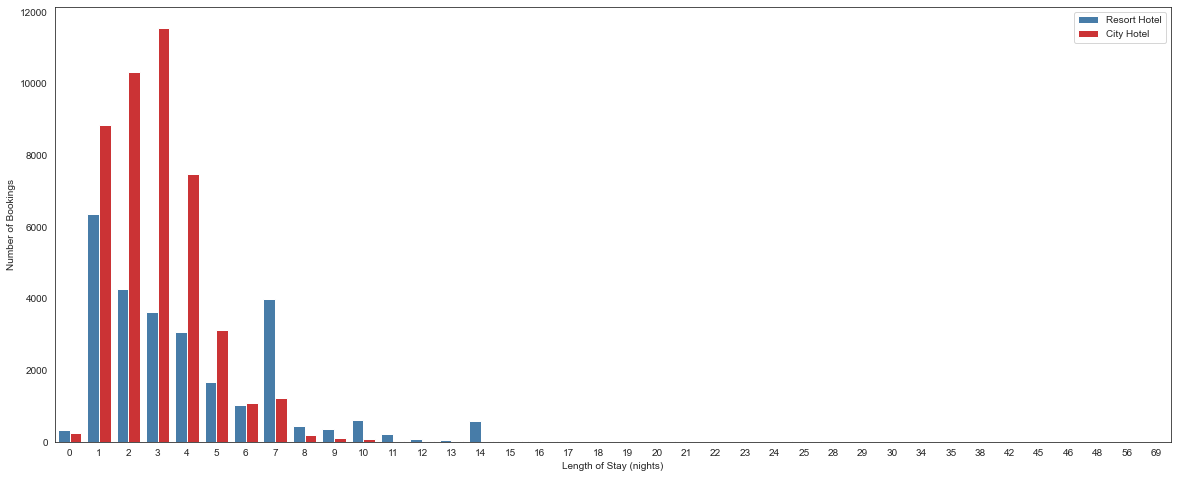

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='total_nights', y='number of bookings', hue='hotel', hue_order=['Resort Hotel','City Hotel'], data=nights, palette=palette)
plt.xlabel('Length of Stay (nights)')
plt.ylabel('Number of Bookings')
plt.legend(title='', loc=1)
plt.show()

Guests mostly stay 1-4 days in the City Hotel. They tend to stay longer at the Resort Hotel, as there is a significant number of guests staying at the Resort Hotel up to 14 days.

#### Distribution of Length of Stays by Hotel Type

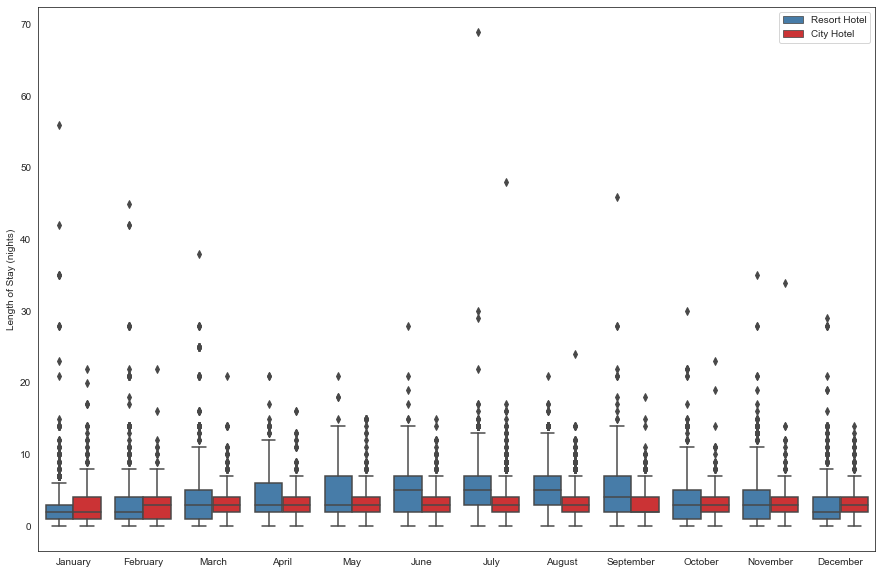

In [46]:
plt.figure(figsize=(15,10))
sns.boxplot(x='arrival_date_month', y='total_nights', data=sd.Sort_Dataframeby_Month(df=df_clean, monthcolumnname='arrival_date_month'), hue='hotel', palette=palette)
plt.xlabel('')
plt.ylabel('Length of Stay (nights)')
plt.legend(title='')
plt.show()

The lengths of stays for guests at Resort Hotel vary throughout the year. It is common that guests stay for around 5 days during the start and the end of the year, while it gets longer during the mid-year from April to September, typically ranging up to 7 days. As for guests at the City Hotel, they tend to stay shorter than those at the Resort Hotel throughout the year, mostly for less than 5 days. The lengths of stays for guests at the City Hotel do not relatively vary as much when compared to those at the Resort Hotel.

### Analysis of Market Segments

#### Bookings by Market Segment

In [47]:
df['market_segment'].value_counts()

Online TA        54252
Offline TA/TO    22798
Groups           17692
Direct           11727
Corporate         5160
Complementary      689
Aviation           235
Name: market_segment, dtype: int64

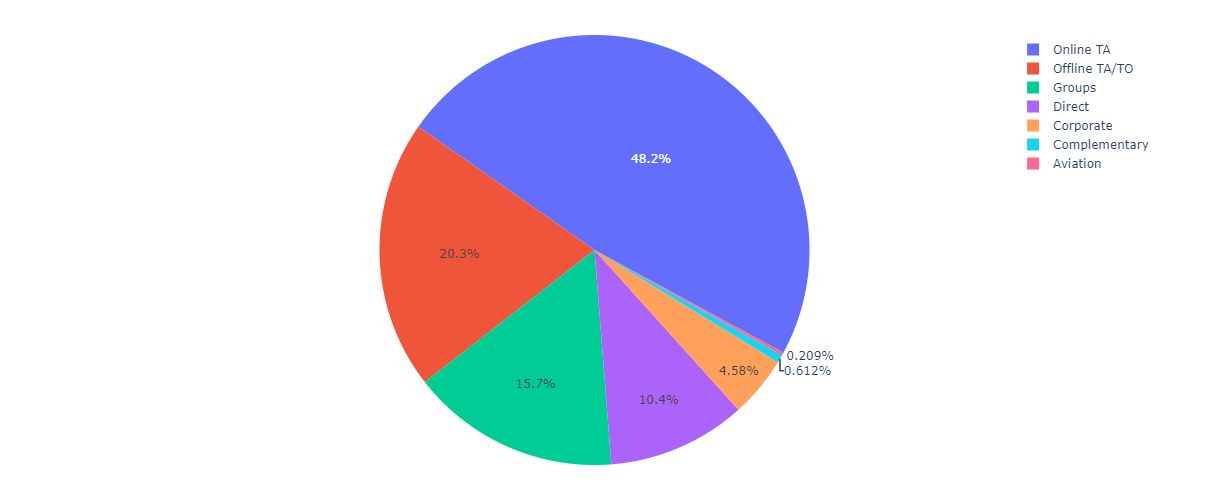

In [48]:
fig = px.pie(df,values=df['market_segment'].value_counts(), names=df['market_segment'].value_counts().index, height=500)
fig.update_layout(margin=dict(l=0, r=0, t=35, b=35))
fig.update_traces(rotation=-55)
fig.show()

Almost half of the bookings are made via online travel agents. 1/5 of bookings are made through offline travel agents or tour operators, followed by group reservations, direct bookings, and corporate bookings.

#### Distribution of the Number of Nights Spent by Market Segment

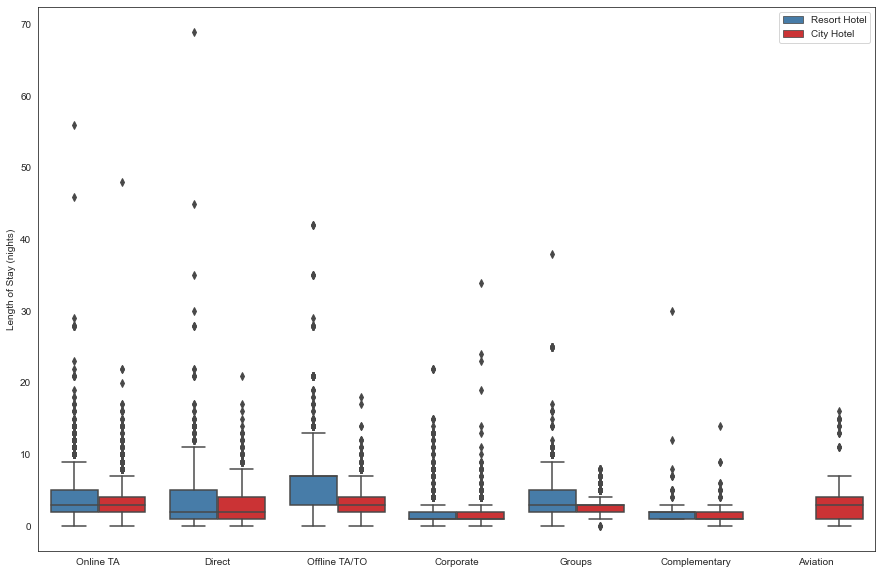

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(x='market_segment', y='total_nights', data=df_clean, hue='hotel', palette=palette)
plt.xlabel('')
plt.ylabel('Length of Stay (nights)')
plt.legend(title='')
plt.show()

You can see some groups are normally distributed while others appear to have high skewness. Judging from the distribution, most people do not seem to prefer to stay at the City Hotel for longer than one week. Guests at the Resort Hotel tend to stay longer, occasionally longer than a week or 10 days, even.

#### Market Segment, ADR, and Room Type

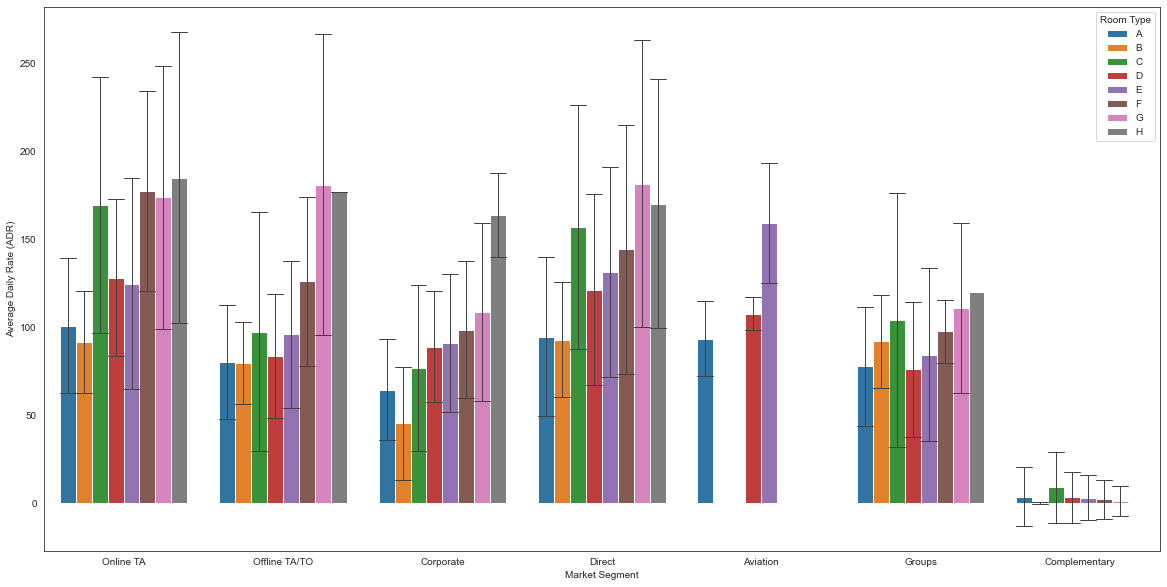

In [50]:
plt.figure(figsize=(20, 10))
sns.barplot(x='market_segment',
            y="adr",
            hue='reserved_room_type',
            data=df_clean.sort_values(by='reserved_room_type'),
            ci="sd",
            errwidth=1,
            capsize=0.1)
plt.xlabel('Market Segment')
plt.ylabel('Average Daily Rate (ADR)')
plt.legend(title='Room Type')
plt.show()